<a href="https://colab.research.google.com/github/AngelOttoni/artificial-intelligence-data-sci/blob/main/natural-language-processing/sentiment_analyzer-v0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2 - N-gramas, TF-IDF e Uso de Redes Neurais**

>**Nanodegree 1: Natural Language Processing `NLP`**

## **Sentiment Analyzer**


[artificial-intelligence-data-sci](https://github.com/AngelOttoni/artificial-intelligence-data-sci.git)

## **Guide:**

- The IMDB dataset contains 50 thousand movie reviews and is used for binary sentiment classification (positive and negative).


  1. Access the [IMDB](https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews) dataset, which contains 50,000 movie reviews.  
  2. Use the `Pandas` `Python` package, to analyze this dataset.
    - To do so, open [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb#recent=true).  

### **Movies Dataset**

- In this study tutorial, we will cover techniques for performing text classification.
- To do this, we will use a dataset of films.
  - See the following tutorial:

In [1]:
#Import Pandas using:
import pandas as pd

In [2]:
# Read the CSV file from the Google Drive link
url = 'https://drive.google.com/u/0/uc?id=1ZlZsxrMHhZZb9ZTYABOiWw7bCPofY6cz&export=download'
df = pd.read_csv(url, header=0)

In [3]:
# Display the first few rows of the DataFrame
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


- Checks whether there are null values in the dataset:

In [4]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

- Em seguida, vamos verificar a quantidade de exemplos positivos e negativos:

In [5]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

- Como podemos ver acima, as classes estão balanceadas, com 25.000 exemplos para cada classe.
- Vamos plotar essa relação:

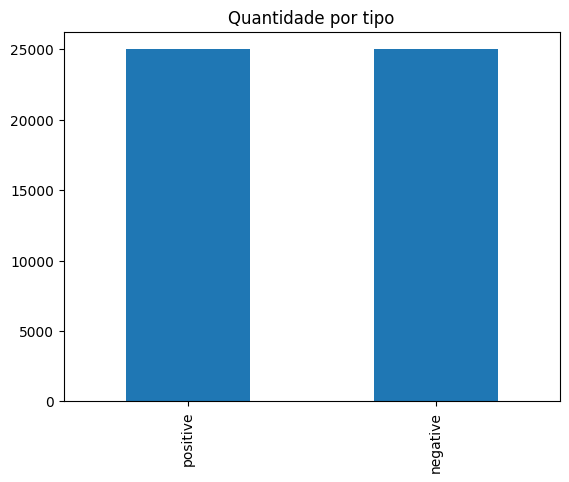

In [6]:
df['sentiment'].value_counts().plot.bar(title="Quantidade por tipo",rot=90);

## **Pré-processamento do texto com `NLTK`**

- A etapa de pré-processamento é muito importante para se criar modelos PLN adequados e eficazes.
- Dessa forma, nosso objetivo agora é iniciar esse pré-processamento.
- Agora que você já conhece um pouco seu dataset, importe a biblioteca NLTK do Python e realize o pré-processamento do texto utilizando as técnicas que já estudamos.

In [7]:
!pip install nltk

In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

- Em seguida, vamos imprimir o primeiro exemplo:

In [9]:
example = df['review'].values[0]
print(example)
print(len(example.split()))

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

- Vamos utilizar o código que já aprendemos para remover pontuações, stopwords e realizar a contagem de palavras:

In [10]:
#Código fornecido na apostila
# from nltk.tokenize.sonority_sequencing import punctuation
# from nltk.tokenize import word_tokenize
# import string
# stopwords = nltk.corpus.stopwords.words('english')
# punctuations = list(string.punctuation)

- My update:

In [11]:
import nltk
import string

In [12]:
# Download NLTK data (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
# Define stopwords and punctuation
stop_words = set(stopwords.words('english'))
punctuations = set(string.punctuation)

In [14]:
def initial_preparation(text):
  words = [
      i for i in word_tokenize(text, language='english')
      if i not in punctuations]
  words = [
      i for i in words if i not in stop_words
  ]
  return words

In [15]:
prepared_example = initial_preparation(example)
print(prepared_example)
print(len(prepared_example))

['One', 'reviewers', 'mentioned', 'watching', '1', 'Oz', 'episode', "'ll", 'hooked', 'They', 'right', 'exactly', 'happened', 'me.', 'br', 'br', 'The', 'first', 'thing', 'struck', 'Oz', 'brutality', 'unflinching', 'scenes', 'violence', 'set', 'right', 'word', 'GO', 'Trust', 'show', 'faint', 'hearted', 'timid', 'This', 'show', 'pulls', 'punches', 'regards', 'drugs', 'sex', 'violence', 'Its', 'hardcore', 'classic', 'use', 'word.', 'br', 'br', 'It', 'called', 'OZ', 'nickname', 'given', 'Oswald', 'Maximum', 'Security', 'State', 'Penitentary', 'It', 'focuses', 'mainly', 'Emerald', 'City', 'experimental', 'section', 'prison', 'cells', 'glass', 'fronts', 'face', 'inwards', 'privacy', 'high', 'agenda', 'Em', 'City', 'home', 'many', '..', 'Aryans', 'Muslims', 'gangstas', 'Latinos', 'Christians', 'Italians', 'Irish', '....', 'scuffles', 'death', 'stares', 'dodgy', 'dealings', 'shady', 'agreements', 'never', 'far', 'away.', 'br', 'br', 'I', 'would', 'say', 'main', 'appeal', 'show', 'due', 'fact', 

Passamos de 307 para 196 tokens. Veja que existem algumas palavras muito pequenas (com apenas uma letra), além de algumas palavras que podemos ignorar. É possível criar um código adicional para removê-las.

Além disso, vamos utilizar uma técnica chamada stemming. Stemming é a técnica de remover sufixos e prefixos de uma palavra, chamada stem. Por exemplo, o stem da palavra cooking é cook. Um bom algoritmo sabe que "ing" é um sufixo e pode ser removido. Stemming é muito usado em mecanismos de buscas para a indexação de palavras. Vamos utilizar stemming para simplificar ainda mais nosso problema, removendo variações de palavras.

Vamos removê-las adicionando à nossa função o código abaixo:

In [ ]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')

In [16]:
MIN_LEN = 1
IGNORE = ['..', '...', '....', 'br','.so','\'ll']

In [17]:
def prep(text):
  words = [
      i for i in word_tokenize(text, language='english') if i not in punctuations
  ]
  words = [
      i for i in words if i not in stop_words
  ]
  words = [
      i for i in words if len(i) > MIN_LEN
  ]
  words = [
      i for i in words if i not in IGNORE
  ]
  words = [
      stemmer.stem(i) for i in words
  ]
  return words

In [18]:
prepared_example = prep(example)
print(prepared_example)
print(len(prepared_example))

['one', 'review', 'mention', 'watch', 'oz', 'episod', 'hook', 'they', 'right', 'exact', 'happen', 'me.', 'the', 'first', 'thing', 'struck', 'oz', 'brutal', 'unflinch', 'scene', 'violenc', 'set', 'right', 'word', 'go', 'trust', 'show', 'faint', 'heart', 'timid', 'this', 'show', 'pull', 'punch', 'regard', 'drug', 'sex', 'violenc', 'it', 'hardcor', 'classic', 'use', 'word.', 'it', 'call', 'oz', 'nicknam', 'given', 'oswald', 'maximum', 'secur', 'state', 'penitentari', 'it', 'focus', 'main', 'emerald', 'citi', 'experiment', 'section', 'prison', 'cell', 'glass', 'front', 'face', 'inward', 'privaci', 'high', 'agenda', 'em', 'citi', 'home', 'mani', 'aryan', 'muslim', 'gangsta', 'latino', 'christian', 'italian', 'irish', 'scuffl', 'death', 'stare', 'dodgi', 'deal', 'shadi', 'agreement', 'never', 'far', 'away.', 'would', 'say', 'main', 'appeal', 'show', 'due', 'fact', 'goe', 'show', 'would', "n't", 'dare', 'forget', 'pretti', 'pictur', 'paint', 'mainstream', 'audienc', 'forget', 'charm', 'forget

- **Assim, reduzimos de 196 para 176 tokens.**
- **Agora que já testamos a função, vamos executar essa função de preparação na coluna review do nosso dataset e, em seguida, juntaremos novamente o texto para ele voltar a ser uma sentença, e não uma lista de palavras.**
- **Como a função pode demorar, vamos utilizar a diretiva `%%time` para nos mostrar o tempo de processamento.**

In [19]:
%%time
df['review2'] = df['review'].apply(prep)
df['review2'] = df['review2'].apply(' '.join)

CPU times: user 4min 2s, sys: 1.56 s, total: 4min 4s
Wall time: 5min 2s


In [20]:
df.head()

,review,sentiment,review2
0,One of the other reviewers has mentioned that ...,positive,one review mention watch oz episod hook they r...
1,A wonderful little production. <br /><br />The...,positive,wonder littl product the film techniqu unassum...
2,I thought this was a wonderful way to spend ti...,positive,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,negative,basic 's famili littl boy jake think 's zombi ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei 's `` love time money '' visual ...


- Pronto! Podemos agora começar a utilizar um **algoritmo de machine learning** para tentar classificar os nossos exemplos.

- Vamos, primeiramente, separar os dados de treino e teste, sendo 20% para os dados de teste.

- Para isso, utilizaremos a função [**`train_test_split`**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['review2'], df['sentiment'], test_size=0.2, random_state=0)
print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)
print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)

X_train shape: (40000,)
y_train shape: (40000,)
X_test shape: (10000,)
y_test shape: (10000,)


- Agora, criaremos o **Bag-of-Words (BoW)** para os dados de treino e teste utilizando a função [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html):

In [22]:
%%time
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,1))
bow_X_train = cv.fit_transform(X_train)
bow_X_test = cv.transform(X_test)
print('bow_X_train shape:', bow_X_train.shape)
print('bow_X_test shape:', bow_X_test.shape)

bow_X_train shape: (40000, 32224)
bow_X_test shape: (10000, 32224)
CPU times: user 7.03 s, sys: 114 ms, total: 7.14 s
Wall time: 7.27 s


- Veja que temos um total de 32.224 palavras no nosso dicionário, gerando, assim, uma entrada de 32.224 colunas para cada exemplo!

- Como os valores de sentimento são **"positive"** e **"negative"**, precisamos codificar em um formato que seja possível utilizar em modelos de **machine learning**.

- Vamos, então, criar o `one-hot-encoding` para esses valores, com a função [`LabelBinarizer`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html).

In [23]:
# Import the LabelBinarizer class from the sklearn.preprocessing module
from sklearn.preprocessing import LabelBinarizer

# Create an instance of the LabelBinarizer class
lb = LabelBinarizer()

# Transform the 'y_train' labels into one-hot encoded format
ohe_y_train = lb.fit_transform(y_train)

# Transform the 'y_test' labels into one-hot encoded format
ohe_y_test = lb.fit_transform(y_test)

In [24]:
# Print the shape (dimensions) of the one-hot encoded training labels
print('ohe_y_train shape:',ohe_y_train.shape)

# Print the shape (dimensions) of the one-hot encoded test labels
print('ohe_y_test shape:',ohe_y_test.shape)

ohe_y_train shape: (40000, 1)
ohe_y_test shape: (10000, 1)


- Vimos até aqui como realizar o pré-processamento do texto e como fazer a modelagem matemática para preparar os dados para serem utilizados pelos modelos de **machine learning**.

- Na sequência, vamos criar dois modelos de **machine learning**.

# **Use of Machine Learning models**

- **Machine learning** is a technique in which machines can learn from data.

- Currently, many organizations are looking to machine learning to better understand their data, make better decisions and, therefore, achieve competitive advantage and better take advantage of business opportunities.

[scikit-learn package](https://scikit-learn.org/stable/)

- Vamos começar utilizando dois modelos tradicionais de machine learning.

## **Tutorial**

- Antes de utilizar redes neurais, vamos utilizar dois modelos tradicionais de machine learning.
- Abaixo os links para as documentações oficiais desses modelos no site do scikit-learn:

  - [LogisticRegression]( https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

  - [SGDClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

In [46]:
import sklearn
print(sklearn.__version__)

1.2.2


In [47]:
!pip install --upgrade scikit-learn

In [58]:
%%time
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l2', max_iter=500, C=1, random_state=42)
lr.fit(bow_X_train,ohe_y_train.ravel())
print(lr)

LogisticRegression(C=1, max_iter=500, random_state=42)
CPU times: user 1.57 s, sys: 1.05 s, total: 2.62 s
Wall time: 2.76 s


- Vamos verificar o score e as demais métricas do modelo:

In [59]:
from sklearn.metrics import accuracy_score, classification_report
y_predict = lr.predict(bow_X_test)

In [60]:
print("LogReg Score:",accuracy_score(ohe_y_test, y_predict))
print(classification_report(ohe_y_test, y_predict, target_names=['Positive','Negative']))

LogReg Score: 0.5417
              precision    recall  f1-score   support

    Positive       0.53      0.89      0.66      5035
    Negative       0.63      0.19      0.29      4965

    accuracy                           0.54     10000
   macro avg       0.58      0.54      0.48     10000
weighted avg       0.58      0.54      0.48     10000



- Veja que obtivemos um resultado de 54% de acurácia. Desse modo, vamos imprimir a matriz de confusão:

- This code is what was provided in the study booklet, but it does not work, because `plot_confusion_matrix` is deprecated and has been replaced by [`ConfusionMatrixDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay).

In [74]:
# from sklearn.metrics import plot_confusion_matrix
# plot_confusion_matrix(lr, bow_x_test, ohe_y_test, values_format='d');

ImportError: ignored

In [72]:
# Import the necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

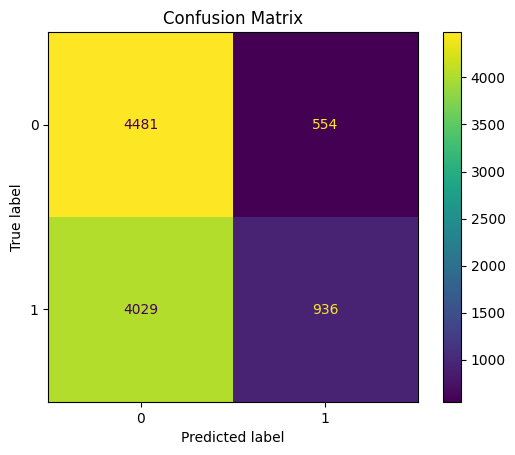

In [77]:
# Create a ConfusionMatrixDisplay object using the estimator 'lr', test data 'bow_X_test', and true labels 'ohe_y_test'
confusion_display = ConfusionMatrixDisplay.from_estimator(lr, bow_X_test, ohe_y_test)

# Set the title for the confusion matrix plot
plt.title("Confusion Matrix")

# Display the confusion matrix plot
plt.show()

- Como pode ser visto acima, estamos com muitos falsos negativos.
- Se mudarmos para o classificador [`SVM`](https://scikit-learn.org/stable/modules/svm.html) - *Support Vector Machine*, obteremos:

In [78]:
# Import the necessary library
from sklearn.linear_model import SGDClassifier

In [79]:

svm = SGDClassifier(loss='hinge', random_state=42)

svm.fit(bow_X_train, ohe_y_train.ravel())

print(svm)

SGDClassifier(random_state=42)


O resultado pode ser observado a seguir:

In [80]:
y_predict = svm.predict(bow_X_test)
print("SVM Score :",accuracy_score(ohe_y_test , y_predict))
print(classification_report(ohe_y_test, y_predict, target_names=['Positive','Negative']))

SVM Score : 0.5422
              precision    recall  f1-score   support

    Positive       0.53      0.89      0.66      5035
    Negative       0.63      0.18      0.29      4965

    accuracy                           0.54     10000
   macro avg       0.58      0.54      0.47     10000
weighted avg       0.58      0.54      0.48     10000



Note que alcançamos um score um pouco melhor.

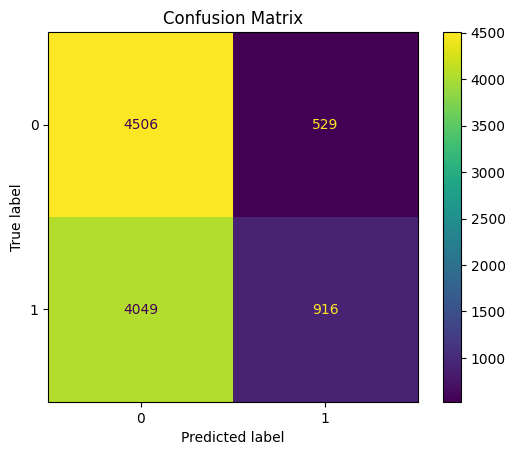

In [81]:
# Create a ConfusionMatrixDisplay object using the estimator 'lr', test data 'bow_X_test', and true labels 'ohe_y_test'
confusion_display = ConfusionMatrixDisplay.from_estimator(svm, bow_X_test, ohe_y_test)

# Set the title for the confusion matrix plot
plt.title("Confusion Matrix")

# Display the confusion matrix plot
plt.show()

### **Conclusion**
- Veja que, apesar das técnicas utilizadas, ainda estamos com um score baixo. Tentaremos melhorar com n-gramas.
- Observe, portanto, que o uso de modelos tradicionais de machine learning com o pré-processamento que fizemos não trouxe resultados satisfatórios.